In [1]:
from envs.atari import Atari
from envs import wrappers

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frame(obs, label=''):
    """Plot a frame without going into interactive mode"""
    # Create a new figure with non-interactive backend for this plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(obs)
    ax.set_title(f'Observation {label}')
    ax.axis('off')
    plt.tight_layout()
    plt.show(block=True)  # Don't block, just display
    plt.close()  # Close the figure to free memory

In [266]:
from stochastic_atari import create_stochasticity_profile

game_name = 'Breakout'

env = Atari(
            game_name,
            4,
            [64, 64],
            gray=False,
            noops=0,
            lives='unused',
            sticky=False,
            actions='needed',
            resize='opencv',
            seed=0,
        )

stochasticity_config = {
    'intrinsic_stochasticity': {
        'action_dependent': {
            'stochastic_action_prob': 0.5,
            },
        'action_independent_random': {
            'mode': '2',
            'random_stochasticity_prob': 0.25, # mode 3: keep around 0.0005
        },
        'action_independent_concept_drift': {
            'temporal_mode': 'cyclic', # 'sudden' or 'cyclic'
            'temporal_threshold': 5,
            'secondary_concept_type': 5,
        },
    },
    'partial_observation': {
            'type': 'crop', # 'blackout' or 'crop' or 'ram'
            'mode': '3', # mode 1 in ram is buggy
            'prob': 0.5,
    },
}

stochasticity_profile = create_stochasticity_profile(game_name=game_name, type=5, config=stochasticity_config)
env = stochasticity_profile.get_env(env)

In [267]:
env = wrappers.OneHotAction(env)
env = wrappers.TimeLimit(env, duration=108000)
env = wrappers.SelectAction(env, key="action")
env = wrappers.UUID(env)

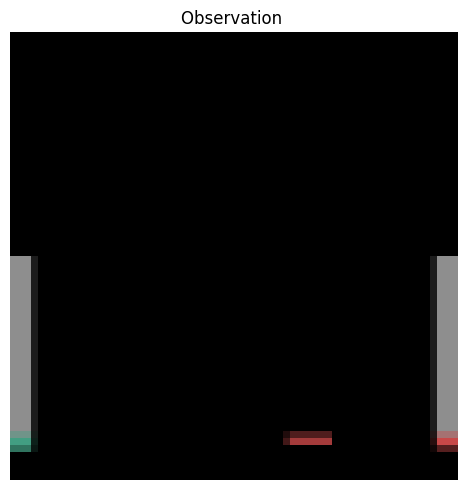

In [268]:
state = env.reset()
state.keys()
plot_frame(state['image'])

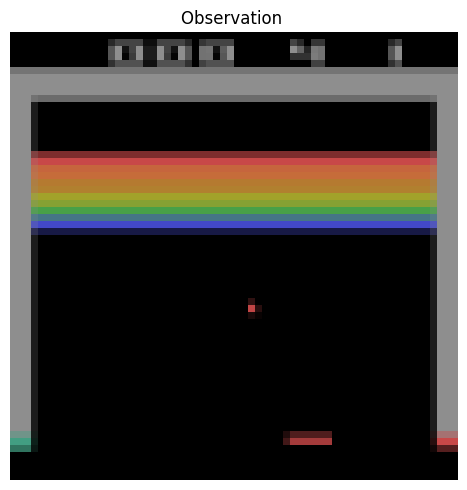

In [294]:
state, reward, is_last, _ = env.step({'action': np.array([0, 1 , 0, 0])})
# print(env.env.env.env.env._step_count)
plot_frame(state['image'])